# Solv the sysmtem with WNTR SOLVER

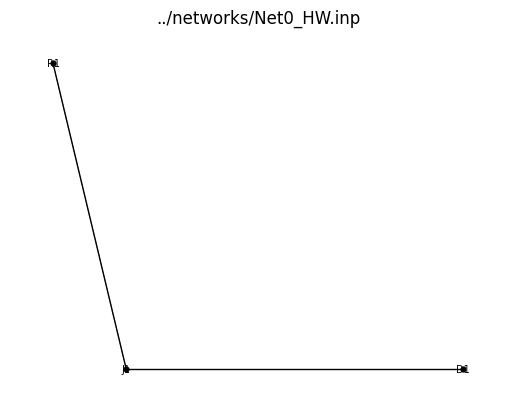

cons:
mass_balance[J1]:   ((expected_demand[J1]-flow[P1])+flow[P2])
mass_balance[D1]:   (expected_demand[D1]-flow[P2])
approx_hazen_williams_headloss[P1]:   (((((((-((sign(flow[P1]))))*hw_resistance[P1])*((abs(flow[P1]))**1.852))-((1e-05*(hw_resistance[P1]**0.5))*flow[P1]))-(((sign(flow[P1]))*minor_loss[P1])*(flow[P1]**2.0)))+source_head[R1])-head[J1])
approx_hazen_williams_headloss[P2]:   (((((((-((sign(flow[P2]))))*hw_resistance[P2])*((abs(flow[P2]))**1.852))-((1e-05*(hw_resistance[P2]**0.5))*flow[P2]))-(((sign(flow[P2]))*minor_loss[P2])*(flow[P2]**2.0)))+head[J1])-head[D1])

vars:
flow[P1]:   flow[P1]
flow[P2]:   flow[P2]
head[J1]:   head[J1]
head[D1]:   head[D1]



In [50]:
import wntr
import wntr_quantum
from wntr.sim.hydraulics import create_hydraulic_model

# Create a water network model
inp_file = '../networks/Net0_HW.inp'
# inp_file = '../networks/Net1_scenario1.inp'
# inp_file = '../networks/Net2Loops.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)

model, updater = create_hydraulic_model(wn, HW_approx='default')
print(model.__str__())


In [59]:
print(11**9)

2357947691


In [51]:
# define the classical simulator
sim = wntr.sim.WNTRSimulator(wn)

# run the simulation
results = sim.run_sim()

In [52]:
results.node['pressure']

,J1,D1,R1
0,-913388.01909,-4.185789e+07,0.0
3600,-913388.01909,-4.185789e+07,0.0


In [53]:
results.link['flowrate']

,P1,P2
0,0.05,0.05
3600,0.05,0.05


# SET UP THE PROBLEM WITH  DESIGNER

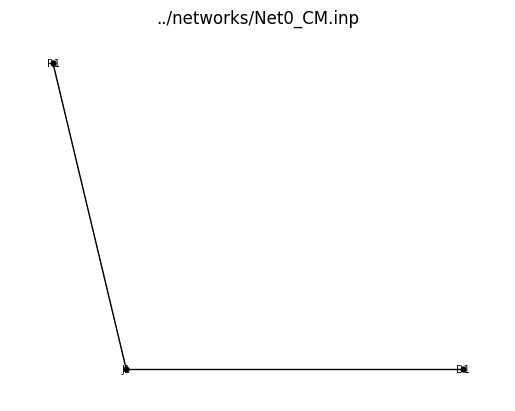

<Axes: title={'center': '../networks/Net0_CM.inp'}>

In [54]:
import wntr
import wntr_quantum
from wntr.sim.hydraulics import create_hydraulic_model

# Create a water network model
inp_file = '../networks/Net0_CM.inp'
# inp_file = '../networks/Net2Loops.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)


## Expression of he network

In [30]:
from wntr_quantum.scenario.network_design_qubo import NetworkDesign
from qubols.solution_vector import SolutionVector_V2 as SolutionVector
from qubols.encodings import  RangedEfficientEncoding, PositiveQbitEncoding

flow_encoding = RangedEfficientEncoding(nqbit=7, range=2, offset=0, var_base_name="x")
head_encoding = RangedEfficientEncoding(nqbit=7, range=2, offset=0, var_base_name="x")


# pipe_diameters = [0.35, 0.4, 0.45, 0.55]
pipe_diameters = [2, 4, 8]
designer = NetworkDesign(wn, flow_encoding=flow_encoding, 
                         head_encoding=head_encoding, 
                         pipe_diameters=pipe_diameters,
                         weight_cost=0.1)

/home/nico/QuantumApplicationLab/qubols/qubols/encodings.py:265: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefs, res, rank, s = np.linalg.lstsq(A, self.discrete_values)


In [31]:
designer.matrices[0]

array([[0.5  ],
       [1.   ],
       [2.   ],
       [0.   ],
       [0.125]])

In [32]:
designer.matrices[1]

array([[-1. ,  1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -1. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. , -1. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. , -1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. , -0.1, -0.1]])

In [33]:
designer.matrices[3].sum(-1).sum(-1)

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [34]:
designer.enumerates_classical_solutions()

(0.12500000000000014, 0.12500000000000014) [1.5   1.    1.719 1.594]
(0.12500000000000014, 0.25) [1.5   1.    1.719 1.469]
(0.12500000000000014, 0.5000000000000002) [1.5   1.    1.719 1.219]
(0.12500000000000014, 0.6250000000000001) [1.5   1.    1.719 1.094]
(0.25, 0.12500000000000014) [1.5   1.    1.438 1.313]
(0.25, 0.25) [1.5   1.    1.438 1.188]
(0.25, 0.5000000000000002) [1.5   1.    1.438 0.938]
(0.25, 0.6250000000000001) [1.5   1.    1.438 0.813]
(0.5000000000000002, 0.12500000000000014) [1.5   1.    0.875 0.75 ]
(0.5000000000000002, 0.25) [1.5   1.    0.875 0.625]
(0.5000000000000002, 0.5000000000000002) [1.5   1.    0.875 0.375]
(0.5000000000000002, 0.6250000000000001) [1.5   1.    0.875 0.25 ]
(0.6250000000000001, 0.12500000000000014) [1.5   1.    0.594 0.469]
(0.6250000000000001, 0.25) [1.5   1.    0.594 0.344]
(0.6250000000000001, 0.5000000000000002) [1.5   1.    0.594 0.094]
(0.6250000000000001, 0.6250000000000001) [ 1.5    1.     0.594 -0.031]


/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


In [35]:
designer.sol_vect_res.encoded_reals[0].get_possible_values()

[0.12500000000000014, 0.25, 0.5000000000000002, 0.6250000000000001]

In [36]:
from qubols.qubo_poly_mixed_variables import QUBO_POLY_MIXED
import sparse
from dwave.samplers import SimulatedAnnealingSampler
from dwave.samplers import SteepestDescentSolver
from dwave.samplers import TabuSampler
from dwave.samplers import RandomSampler
qubo = QUBO_POLY_MIXED(designer.mixed_solution_vector, options={"sampler":TabuSampler()})

In [37]:
matrices = tuple(sparse.COO(m) for m in designer.matrices)
bqm = qubo.create_bqm(matrices, strength=1000)

In [38]:
istart = designer.sol_vect_flows.size
for i in range(designer.sol_vect_heads.size):

    bqm.add_linear_inequality_constraint(
        qubo.all_expr[istart + i],
        lagrange_multiplier=0.1,
        label="head_%s" % i,
        lb=1,
        ub=2,
    )

/home/nico/miniconda3/envs/vitens_wntr_1/lib/python3.9/site-packages/dimod/binary/binary_quadratic_model.py:759: UserWarning: For constraints with fractional coefficients, multiply both sides of the inequality by an appropriate factor of ten to attain or approximate integer coefficients. 
  warnings.warn("For constraints with fractional coefficients, "


In [39]:
sampleset = qubo.sample_bqm(bqm, num_reads=10000)

In [40]:
flow, heads, param = qubo.decode_solution(sampleset.lowest())

In [41]:
flow, heads, param

([1.5238095238095237, 1.0158730158730158],
 [1.746031746031746, 1.0793650793650793],
 [0.12500000000000014, 0.6250000000000001])

In [42]:
import numpy as np
num_heads = designer.wn.num_junctions
designer.verify_solution(np.array(flow+heads), param)

array([-0.008, -0.016, -0.036,  0.022])

In [43]:
sampleset.record[0]

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], -4.576, 1, 4)

In [44]:
nsol = []
cost = []
cons = []
colors = []
count = dict()
for i in range(10000):
    flow, heads, param = qubo.decode_solution(sampleset, sol_index=i)
    nsol.append(np.linalg.norm(designer.verify_solution(np.array(flow+heads), param)))
    cost.append(np.sum(param))
    cons.append(np.sum(np.array(heads)-1))
    if nsol[-1] < 1 and cons[-1] > 0:
        if tuple(param) not in count:
            count[tuple(param)] = 0
        count[tuple(param)] += 1
    



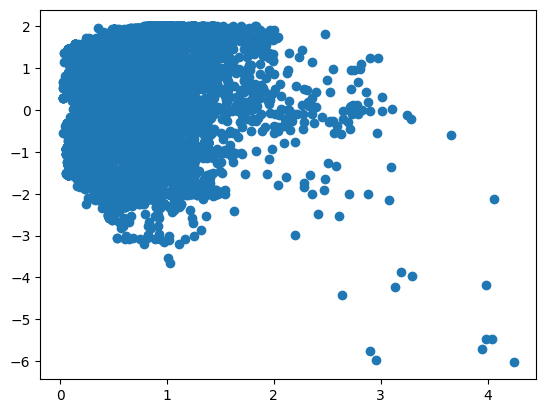

In [45]:
import matplotlib.pyplot as plt
plt.scatter(nsol, cons)

In [46]:
count

{(0.12500000000000014, 0.12500000000000014): 465,
 (0.12500000000000014, 0.6250000000000001): 601,
 (0.6250000000000001, 0.25): 205,
 (0.5000000000000002, 0.12500000000000014): 274,
 (0.12500000000000014, 0.5000000000000002): 535,
 (0.6250000000000001, 0.5000000000000002): 166,
 (0.25, 0.6250000000000001): 281,
 (0.5000000000000002, 0.25): 186,
 (0.25, 0.25): 270,
 (0.5000000000000002, 0.6250000000000001): 146,
 (0.12500000000000014, 0.25): 499,
 (0.5000000000000002, 0.5000000000000002): 163,
 (0.6250000000000001, 0.12500000000000014): 248,
 (0.25, 0.5000000000000002): 237,
 (0.25, 0.12500000000000014): 438,
 (0.6250000000000001, 0.6250000000000001): 144}

In [47]:
designer.enumerates_classical_solutions()

(0.12500000000000014, 0.12500000000000014) [1.5   1.    1.719 1.594]
(0.12500000000000014, 0.25) [1.5   1.    1.719 1.469]
(0.12500000000000014, 0.5000000000000002) [1.5   1.    1.719 1.219]
(0.12500000000000014, 0.6250000000000001) [1.5   1.    1.719 1.094]
(0.25, 0.12500000000000014) [1.5   1.    1.438 1.313]
(0.25, 0.25) [1.5   1.    1.438 1.188]
(0.25, 0.5000000000000002) [1.5   1.    1.438 0.938]
(0.25, 0.6250000000000001) [1.5   1.    1.438 0.813]
(0.5000000000000002, 0.12500000000000014) [1.5   1.    0.875 0.75 ]
(0.5000000000000002, 0.25) [1.5   1.    0.875 0.625]
(0.5000000000000002, 0.5000000000000002) [1.5   1.    0.875 0.375]
(0.5000000000000002, 0.6250000000000001) [1.5   1.    0.875 0.25 ]
(0.6250000000000001, 0.12500000000000014) [1.5   1.    0.594 0.469]
(0.6250000000000001, 0.25) [1.5   1.    0.594 0.344]
(0.6250000000000001, 0.5000000000000002) [1.5   1.    0.594 0.094]
(0.6250000000000001, 0.6250000000000001) [ 1.5    1.     0.594 -0.031]
